In [11]:
import numpy as np
import pandas as pd
df=pd.read_csv("spam.csv")
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4518,ham,Just got part Nottingham - 3 hrs 63miles. Good...,NaN,NaN,NaN
2939,spam,You have 1 new message. Please call 08712400200.,NaN,NaN,NaN
1743,ham,I love to wine and dine my lady!,NaN,NaN,NaN
5465,ham,Shall I bring us a bottle of wine to keep us a...,NaN,NaN,NaN
2450,ham,K..give back my thanks.,NaN,NaN,NaN


In [3]:
#data cleanising
#EDA

In [4]:
#text preprocing
#model building
#evaluation
#imprivement
#webside
#deploye

# Data Cleaning


In [16]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [17]:
df.sample(5)

,target,text
2457,ham,K.k..how is your sister kids?
1586,ham,There are no other charges after transfer char...
5493,ham,I think if he rule tamilnadu..then its very to...
4414,ham,"Yeah I should be able to, I'll text you when I..."
137,ham,No no. I will check all rooms befor activities


In [18]:
df.rename(columns={'v1': 'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3926,ham,Lol ... I really need to remember to eat when ...
4936,ham,G wants to know where the fuck you are
5403,ham,So gd got free ice cream... I oso wan...
4555,ham,Gettin rdy to ship comp
3868,ham,No let me do the math. Your not good at it.


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [21]:
df['target']=encoder.fit_transform(df['target'])

In [29]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [23]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

# EDA

In [24]:
df.value_counts()

target  text                                                                                                                              
0        &lt;#&gt;  in mca. But not conform.                                                                                                  1
        Thats cool. i liked your photos. You are very sexy!                                                                                   1
        That's good, because I need drugs                                                                                                     1
        That's fine, have him give me a call if he knows what he wants or has any questions                                                   1
        That's fine, I'll bitch at you about it later then                                                                                    1
                                                                                                                                             

In [31]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

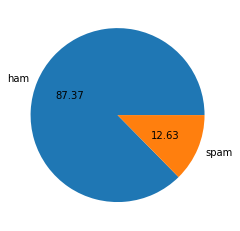

In [25]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

data imbalance

In [4]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
!pip install nltk

In [26]:
df['num_characters']=df['text'].apply(len)

<ipython-input-26-2d4713a058a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

<ipython-input-28-1d0f56c67f20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

<ipython-input-29-7651df1d1447>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
#
df[['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

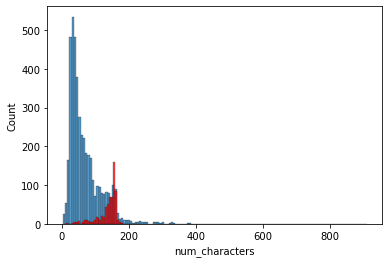

In [32]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

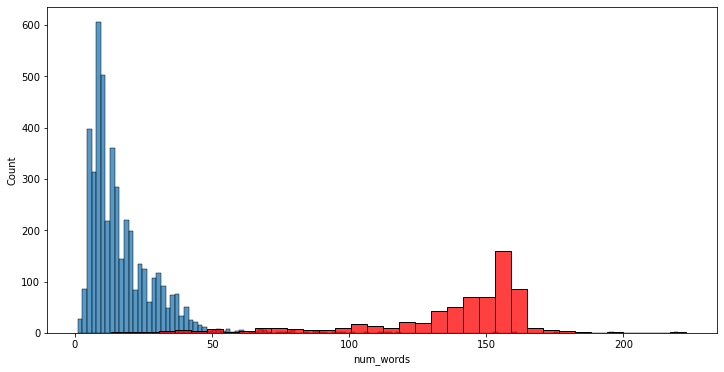

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

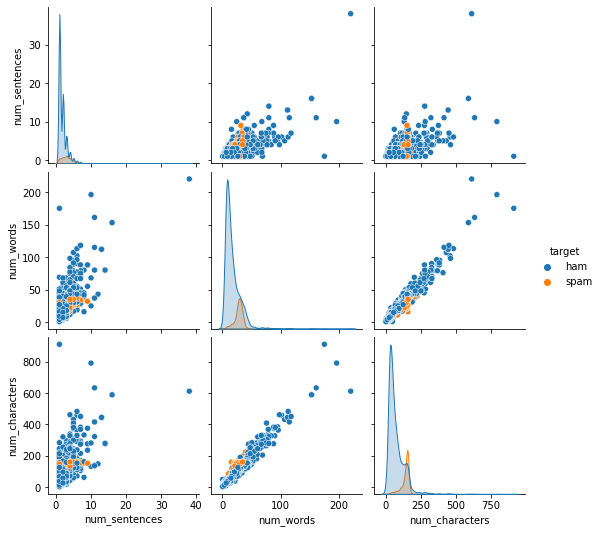

In [47]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

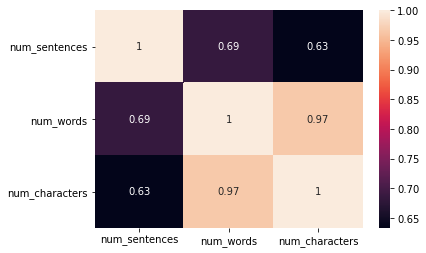

In [48]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing
lower case
TOKENIZATION
REMOVING SPECIAL CHARACTERS
REMOVING STOP WORDS AND PUNCTUATION
STEMMING

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
def transform_text(t):
    t=t.lower()
    t=nltk.word_tokenize(t)
    
    y=[]
    for i in t:
        if i.isalnum():
            y.append(i)
    t=y[:]
    y.clear()
    for i in t:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    t=y[:]
    y.clear()
    for i in t:
           y.append(ps.stem(i))
            
    return " ".join(y)

In [49]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [5]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
transform_text("hi jack  %% 20")

['hi', 'jack', '20']

In [46]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [40]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [52]:
df['transformed_text']=df['text'].apply(transform_text)
df.head()

<ipython-input-52-f4ccc735ba00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [65]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

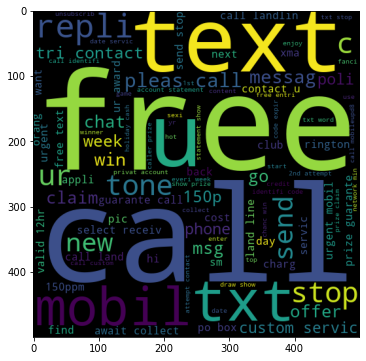

In [68]:
plt.figure(figsize=(16,6))
plt.imshow(spam_wc)

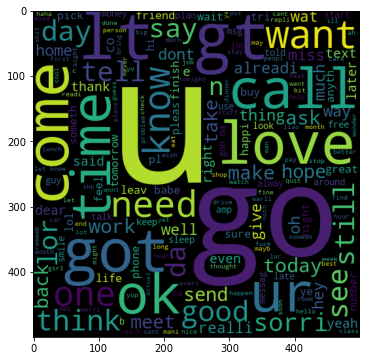

In [70]:
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(16,6))
plt.imshow(spam_wc)

In [74]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    #print(msg)
len(spam_corpus)

9941

C:\Users\abira\anaconda3\trial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


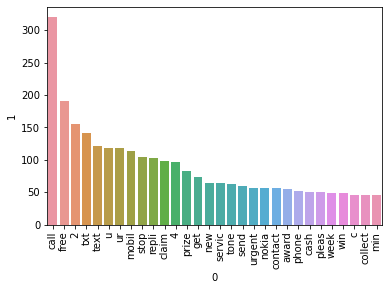

In [81]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter (spam_corpus).most_common(30))[0],pd.DataFrame(Counter (spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [83]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35303

C:\Users\abira\anaconda3\trial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


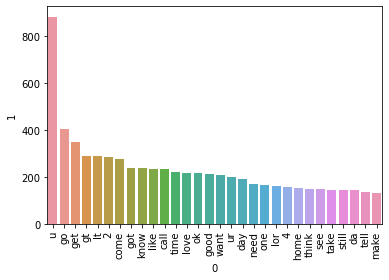

In [84]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [123]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(df['transformed_text']).toarray()
x.shape

(5169, 6677)

In [124]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [125]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [127]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


In [128]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [129]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [ ]:
#tfidf-->MNB


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [24]:
pip install XGBoost


Note: you may need to restart the kernel to use updated packages.


In [32]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

# Functions with used in data sets

In [4]:
list(df.columns)

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [6]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,5562,5563,5564,5565,5566,5567,5568,5569,5570,5571
v1,ham,ham,spam,ham,ham,spam,ham,ham,spam,spam,...,ham,ham,ham,ham,spam,spam,ham,ham,ham,ham
v2,"Go until jurong point, crazy.. Available only ...",Ok lar... Joking wif u oni...,Free entry in 2 a wkly comp to win FA Cup fina...,U dun say so early hor... U c already then say...,"Nah I don't think he goes to usf, he lives aro...",FreeMsg Hey there darling it's been 3 week's n...,Even my brother is not like to speak with me. ...,As per your request 'Melle Melle (Oru Minnamin...,WINNER!! As a valued network customer you have...,Had your mobile 11 months or more? U R entitle...,...,Ok lor... Sony ericsson salesman... I ask shuh...,Ard 6 like dat lor.,Why don't you wait 'til at least wednesday to ...,Huh y lei...,REMINDER FROM O2: To get 2.50 pounds free call...,This is the 2nd time we have tried 2 contact u...,Will �_ b going to esplanade fr home?,"Pity, * was in mood for that. So...any other s...",The guy did some bitching but I acted like i'd...,Rofl. Its true to its name
Unnamed: 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
pd.set_option('display.max_columns',3)
df.head(5)

,v1,...,Unnamed: 4
0,ham,...,NaN
1,ham,...,NaN
2,spam,...,NaN
3,ham,...,NaN
4,ham,...,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
df.v1.value_count()

AttributeError: 'Series' object has no attribute 'value_count'

In [15]:
df[['v1','v2']].describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30
